In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#!pip install WordCloud

In [3]:
#!pip install missingno

In [4]:
#!pip install pycountry_convert

In [5]:
import pandas as pd
import missingno as msno
import numpy as np
from matplotlib import pyplot as plt
from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3, country_alpha3_to_country_alpha2
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS
pyo.init_notebook_mode()

In [6]:
users = pd.read_csv('BX-Users.csv', sep=';', encoding="latin1")

In [7]:
books = pd.read_csv('BX-Books.csv', error_bad_lines=False, sep=';', encoding="latin1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/Users/channabasavannahatti/opt/anaconda3/lib/python3.8/site-packages/IPyt

In [8]:
ratings = pd.read_csv('BX-Book-Ratings.csv', error_bad_lines=False, sep=';', encoding="latin1")

In [9]:
print('The shape of Ratings is: ' + str(ratings.shape))
print('The shape of Users is: ' + str(users.shape))
print('The shape of Books is: ' + str(books.shape))

The shape of Ratings is: (1149780, 3)
The shape of Users is: (278858, 3)
The shape of Books is: (271360, 8)


In [10]:
users.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [11]:
users.columns = ['userId', 'location', 'age']

<AxesSubplot:>

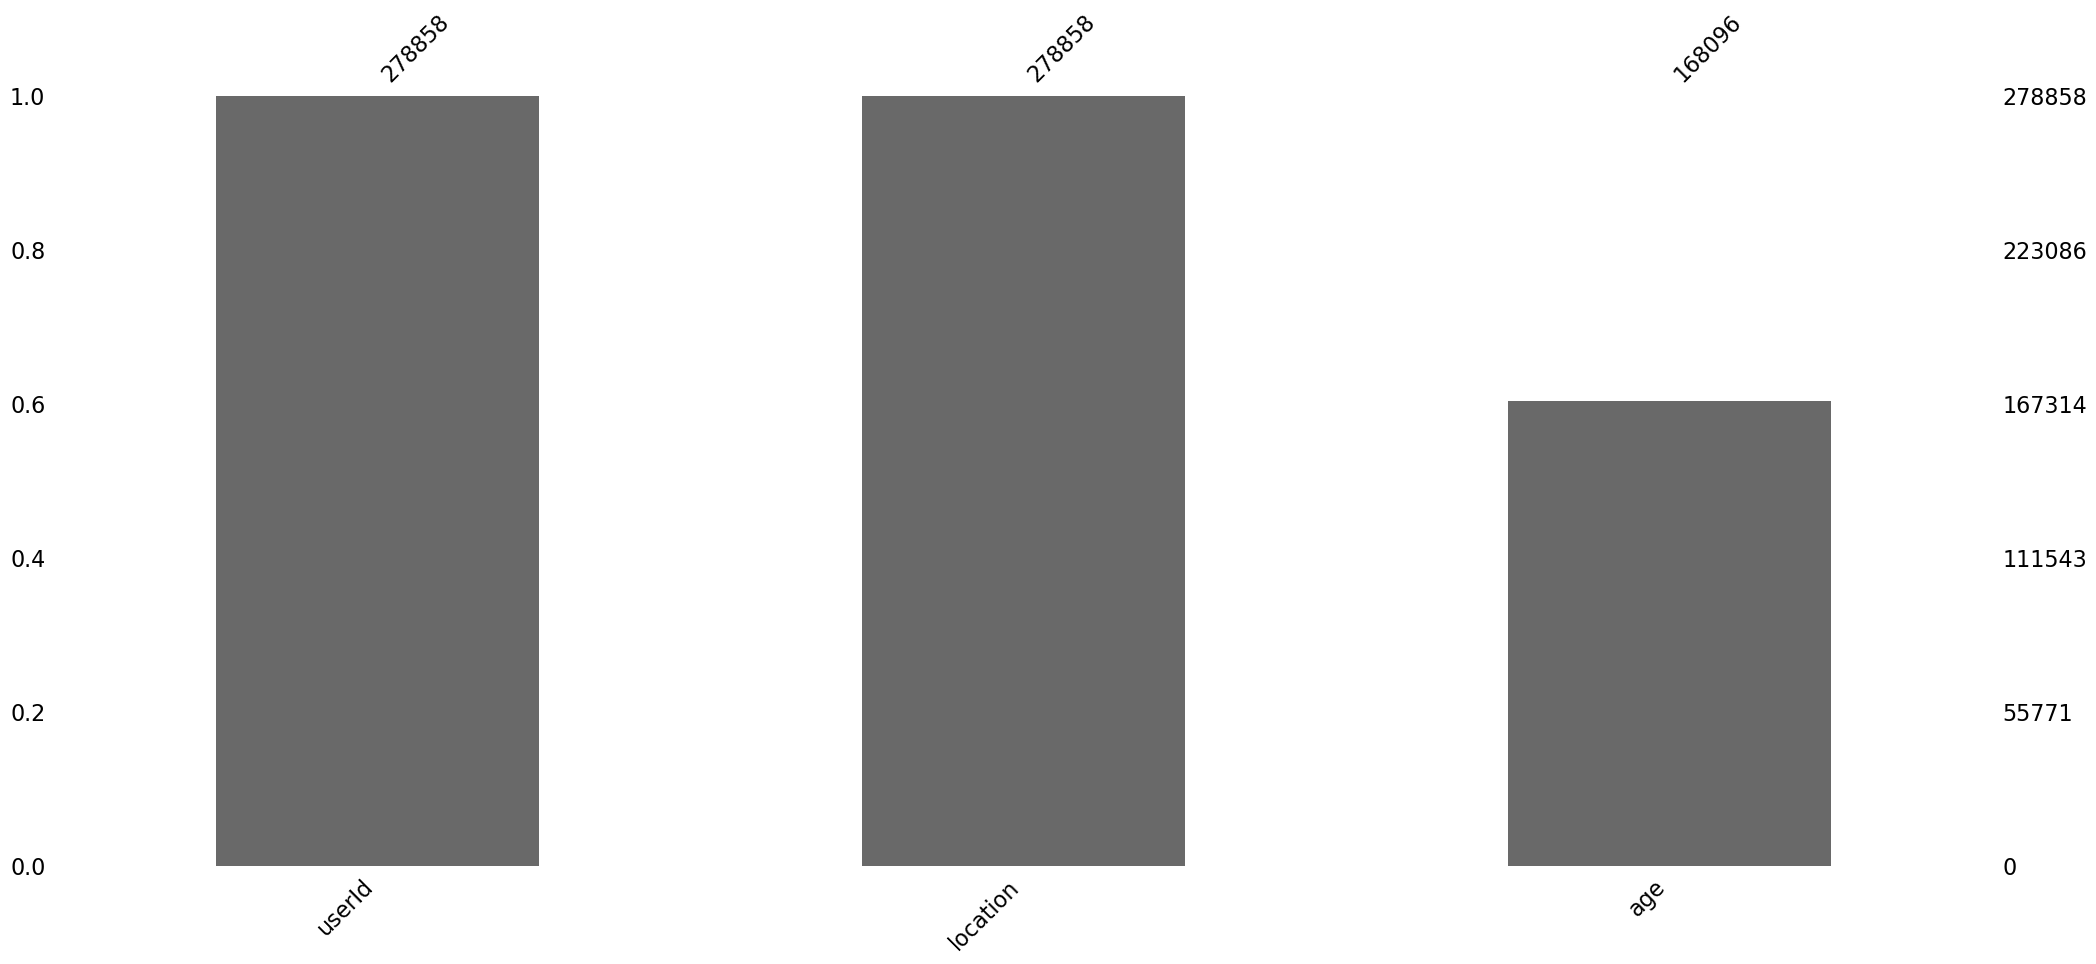

In [12]:
import missingno as msno
msno.bar(users)

In [13]:
users.age = users.age.astype(float)
print("Users with age < 5: ", users.loc[users.age<5,'age'].count())
print("Users with age > 110: ", users.loc[users.age > 110,'age'].count())
users.loc[users.age < 5,'age'] = np.nan
users.loc[users.age > 110,'age'] = np.nan

Users with age < 5:  882
Users with age > 110:  96


In [14]:
temp_age_series = pd.Series(np.random.normal(loc=users.age.mean(), scale=users.age.std(), size=users.userId[users.age.isna()]
                                             .count()))
temp_age_series

0         30.854802
1         38.568607
2         30.782319
3         12.316224
4         21.485409
            ...    
111735    33.269942
111736    40.570579
111737    30.112800
111738    52.713652
111739    24.349987
Length: 111740, dtype: float64

In [15]:
print("Statistics of values in \'users.age\'\n",users.age.describe(),"\n")
print("Statistics of values we are going to use to fill NaN \n",temp_age_series.describe(),"\n")
print("Negative values in \'temp_age_seires\':", temp_age_series[temp_age_series<0].count(),"\n")
print("As we can see the destribution doesnt change a lot. There are some negative values thought.\n")

# take the abs value of temp_age_series
pos_age_series = np.abs(temp_age_series)

# sort users Df so as NaN values in age to be first and reset index to match with index of pos_age_series. Then use fillna()
users = users.sort_values('age',na_position='first').reset_index(drop=True)
users.age.fillna(pos_age_series, inplace = True)  

# replace values < 5 with the mean(). Round values and convert them to int. 
users.loc[users.age<5, 'age'] = users.age.mean()
users.age = users.age.round().astype(int)
#Sort users based on user_id so as to be the same as before
users = users.sort_values('userId').reset_index(drop=True)
print(users.age.describe(),"\n")

Statistics of values in 'users.age'
 count    167118.000000
mean         34.858244
std          13.901748
min           5.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         110.000000
Name: age, dtype: float64 

Statistics of values we are going to use to fill NaN 
 count    111740.000000
mean         34.760943
std          13.873065
min         -25.608884
25%          25.449842
50%          34.713653
75%          44.149035
max          96.687783
dtype: float64 

Negative values in 'temp_age_seires': 713 

As we can see the destribution doesnt change a lot. There are some negative values thought.

count    278858.000000
mean         35.024005
std          13.619268
min           5.000000
25%          25.000000
50%          33.000000
75%          44.000000
max         110.000000
Name: age, dtype: float64 



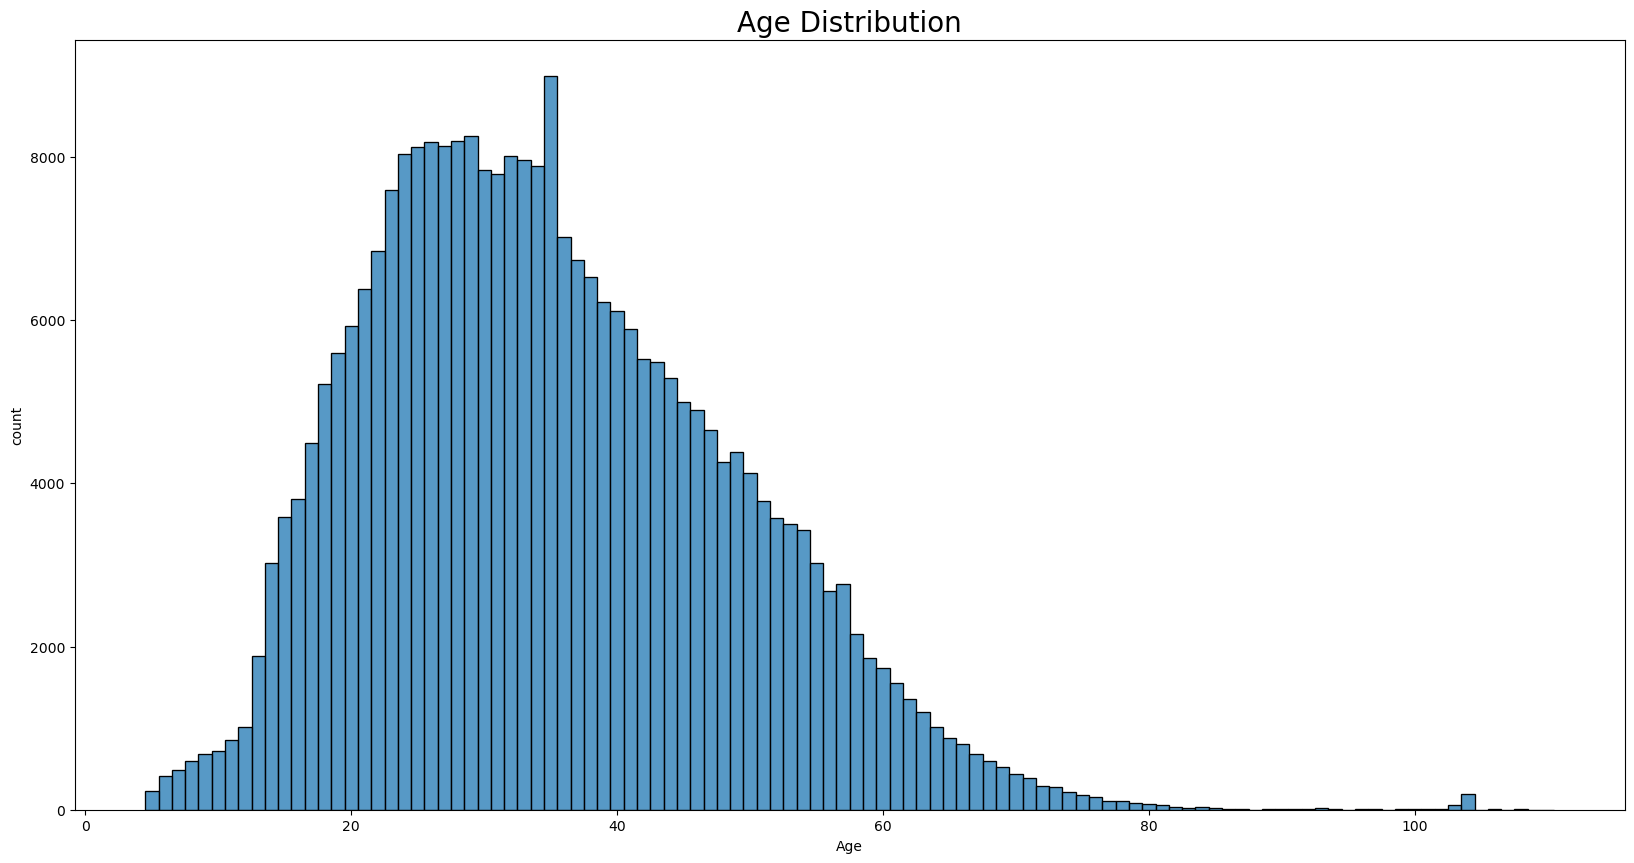

In [16]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.histplot(users['age'], discrete = True)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age Distribution',size=20)
plt.show()

In [17]:
user_location_expanded=users.location.str.split(', ', n=2, expand=True)
user_location_expanded.columns=['city', 'state', 'country']
users = users.join(user_location_expanded)
users.drop(columns=['location'], inplace=True)
users.loc[users.state==',', ['state', 'country']] = 'other'
users.loc[users.country==',', ['country']] = 'other'
users.loc[(users.state=='\\n/a\\"') | (users.state=='') | (users.state=='*') | (users.state=='n.a'), ['state']] = 'n/a'
users.state.fillna('other', inplace=True)
users.fillna('n/a', inplace=True)

In [18]:
users.head()

userId  age         city            state         country
0       1   31          nyc         new york             usa
1       2   18     stockton       california             usa
2       3   39       moscow  yukon territory          russia
3       4   17        porto         v.n.gaia        portugal
4       5   31  farnborough            hants  united kingdom

In [19]:
users['age'] = users['age'].astype(int)
users['userId'] = users['userId'].astype(int) 

### Books DataFrame

In [20]:
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [21]:
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication','publisher', 'imageURLS', 'imageURLM', 'imageURLL']
books.drop(columns=['imageURLS', 'imageURLM', 'imageURLL'], inplace=True)

In [22]:
books.yearOfPublication = pd.to_numeric(books.yearOfPublication, errors='coerce')
zero_yr = books[books.yearOfPublication == 0].yearOfPublication.count()
nan_yr = books.yearOfPublication.isnull().sum()
print(f'There are {zero_yr} entries as \'0\', and {nan_yr} NaN entries in the Year of Publication field')
books.loc[(books.yearOfPublication == 0)|(books.yearOfPublication > 2022) | (books.yearOfPublication < 1950) ,'yearOfPublication' ] = np.nan
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()),inplace=True)
books.yearOfPublication = books.yearOfPublication.astype(int)

There are 4618 entries as '0', and 3 NaN entries in the Year of Publication field


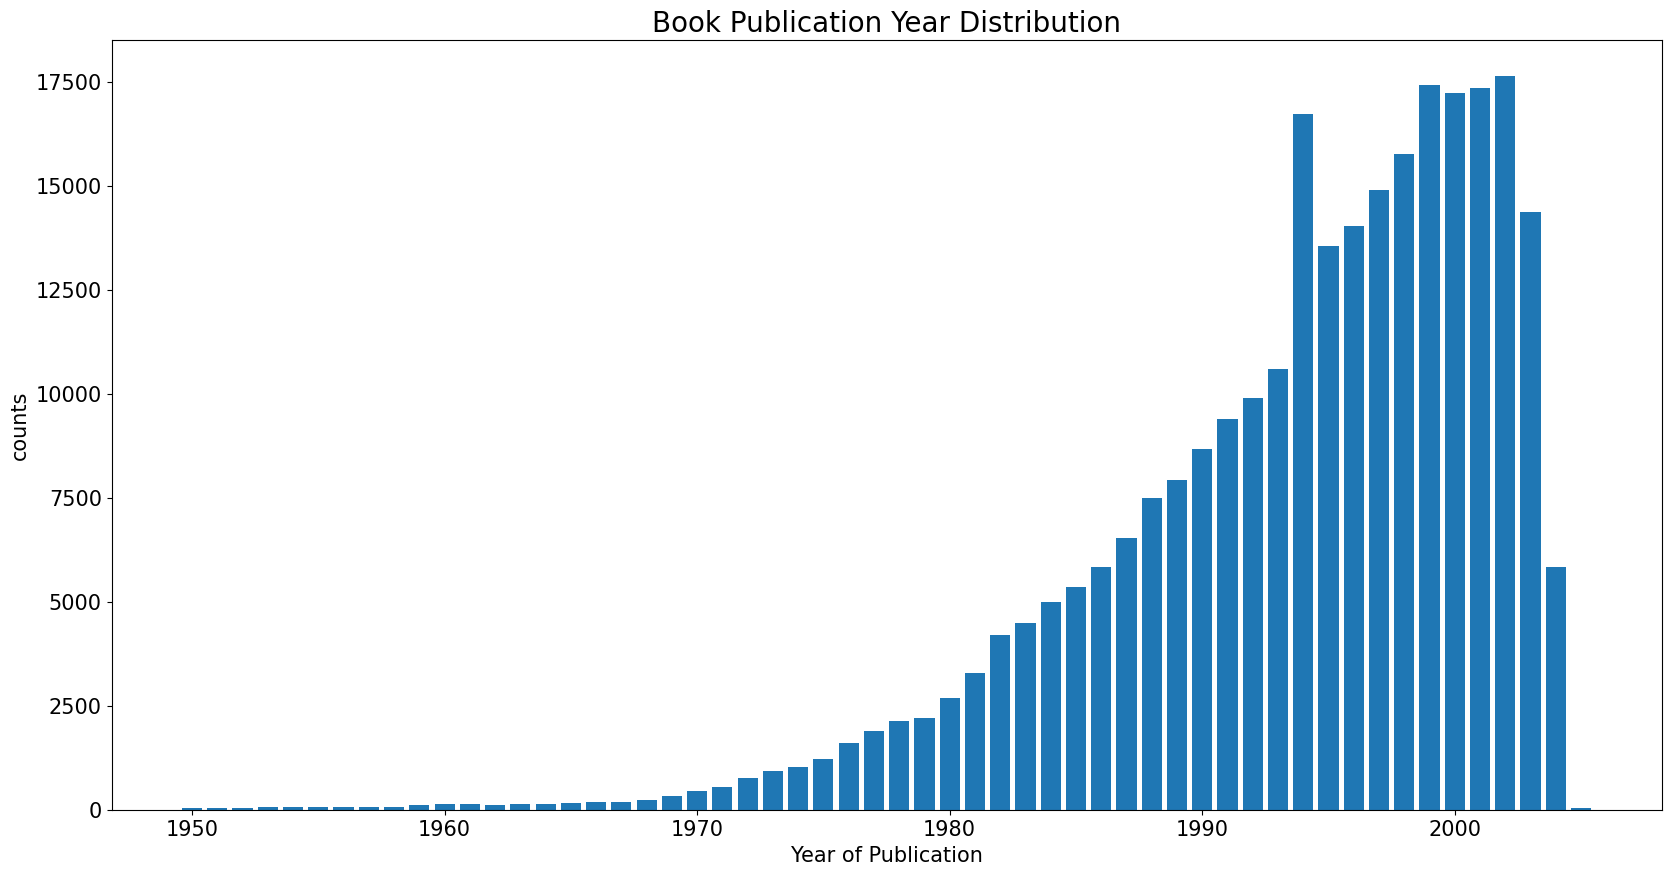

In [23]:
yr = books.yearOfPublication.value_counts().sort_index()
yr = yr.where(yr>5) # filter out counts less than 5
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(yr.index, yr.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.title('Book Publication Year Distribution',size=20)
plt.show()

<AxesSubplot:>

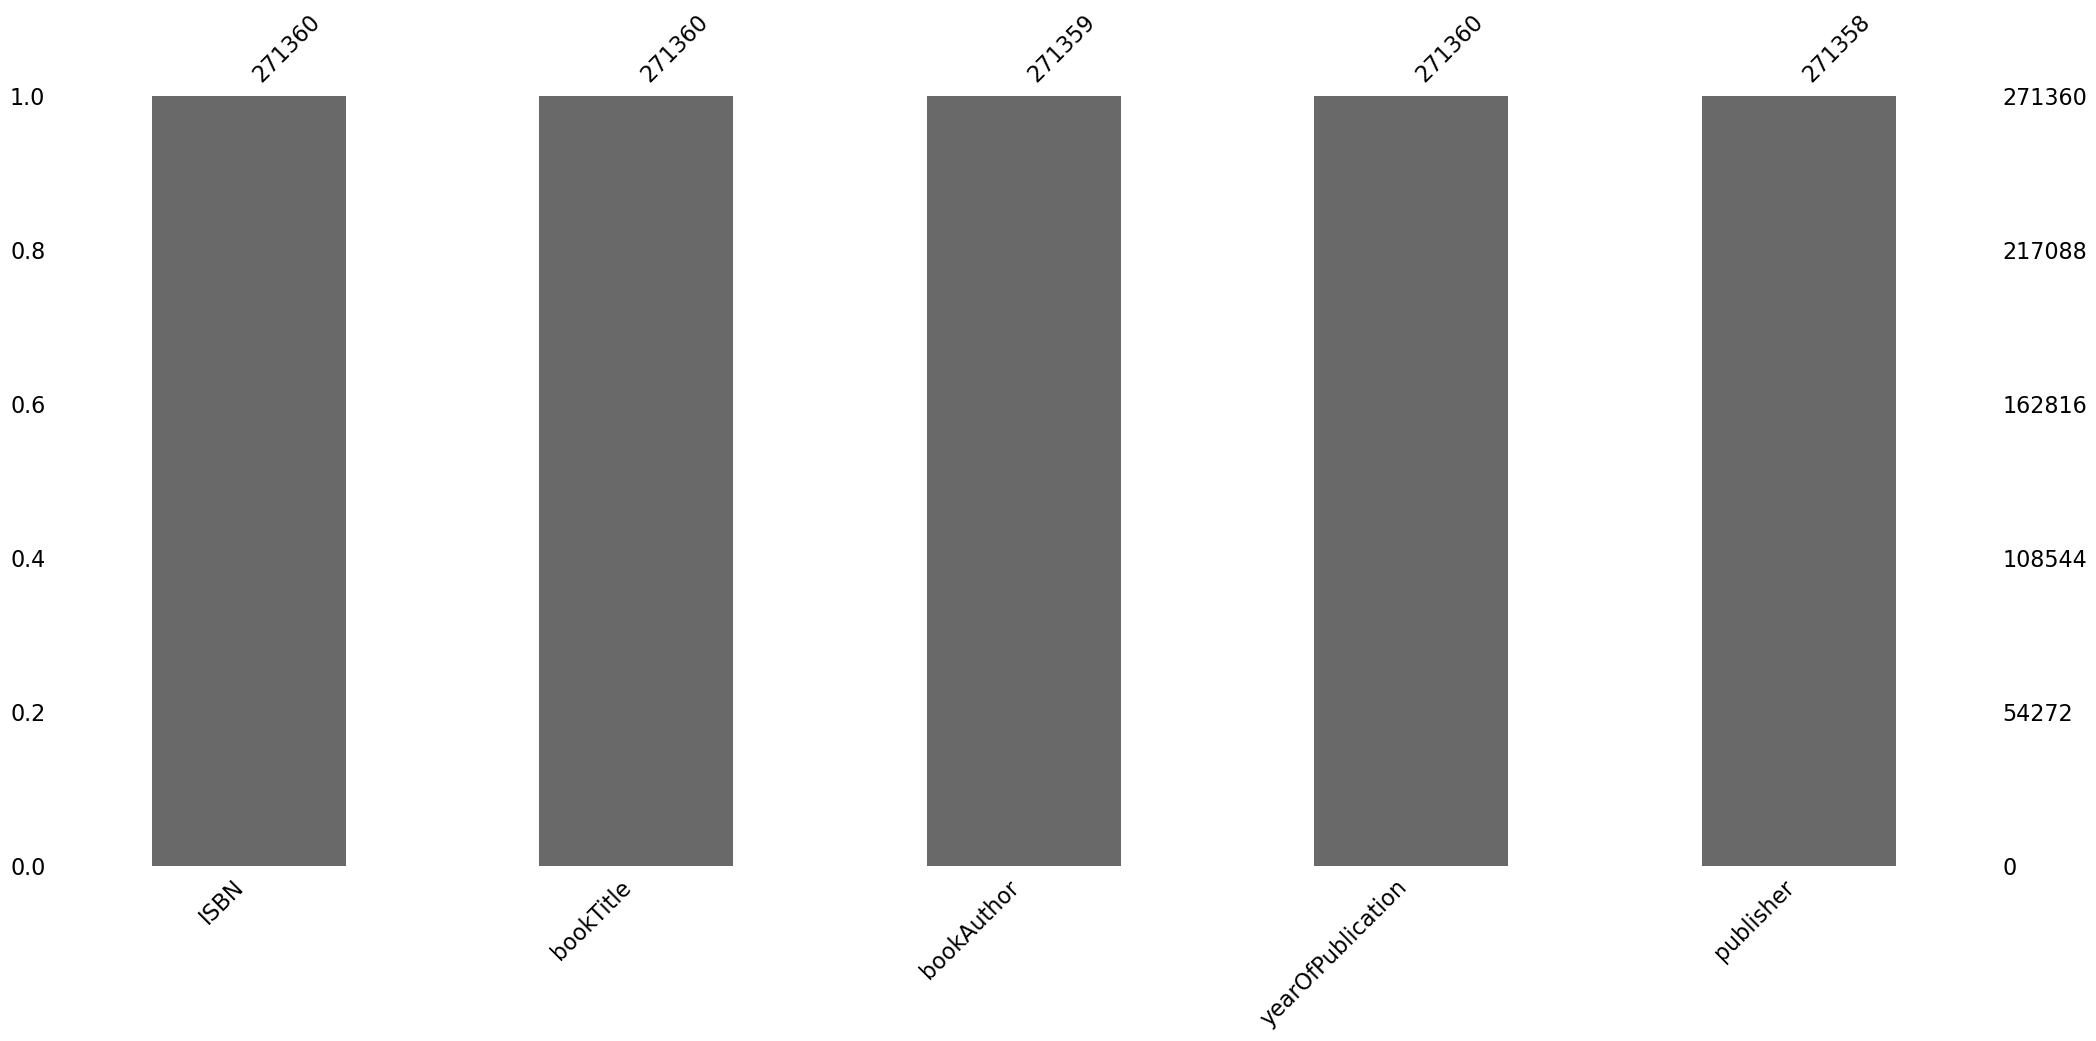

In [24]:
books.publisher = books.publisher.str.replace('&amp', '&', regex=False)
msno.bar(books)

In [25]:
books = books.dropna()
uniq_books = books.ISBN.nunique()
all_books = books.ISBN.count()
print(f'No. of unique books: {uniq_books} | All book entries: {all_books}')

No. of unique books: 271357 | All book entries: 271357


In [26]:
books.head()

ISBN                                          bookTitle  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

             bookAuthor  yearOfPublication                publisher  
0    Mark P. O. Morford               2002  Oxford University Press  
1  Richard Bruce Wright               2001    HarperFlamingo Canada  
2          Carlo D'Este               1991          HarperPerennial  
3      Gina Bari Kolata               1999     Farrar Straus Giroux  
4       E. J. W. Barber               1999  W. W. Norton &; Company

### Ratings DataFrame

In [27]:
ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [28]:
ratings.columns = ['userId', 'ISBN', 'bookRating']

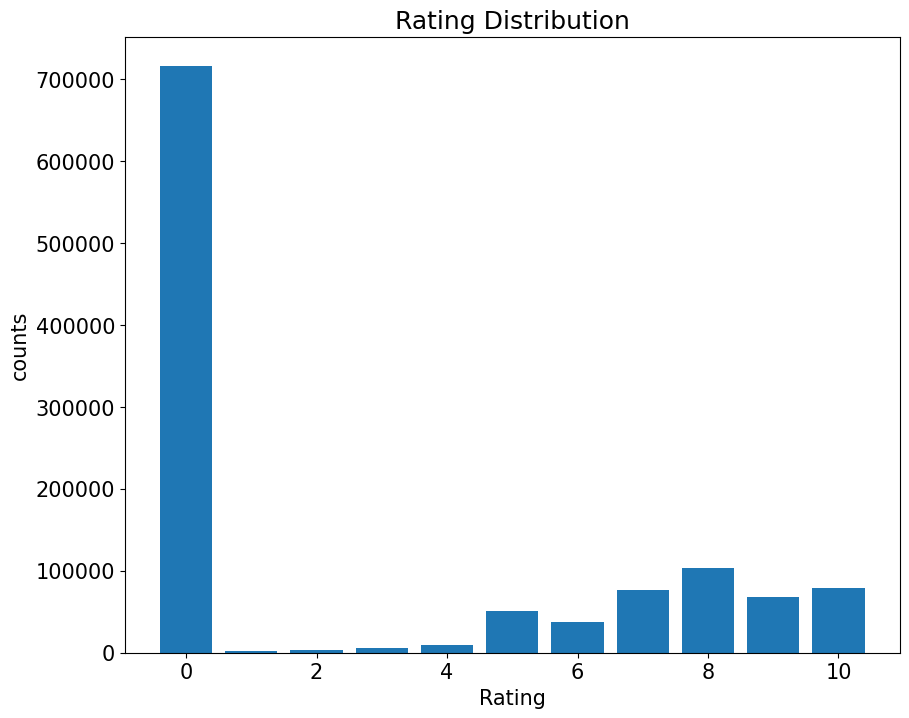

In [29]:
rtg = ratings.bookRating.value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(rtg.index, rtg.values)
plt.xlabel('Rating')
plt.ylabel('counts')
plt.title('Rating Distribution')
plt.show()

In [30]:
print(f'Size of book_ratings before removing zero ratings: {len(ratings)}')
ratings = ratings[ratings.bookRating != 0]
print(f'Size of book_ratings after removing zero ratings: {len(ratings)}')

Size of book_ratings before removing zero ratings: 1149780
Size of book_ratings after removing zero ratings: 433671


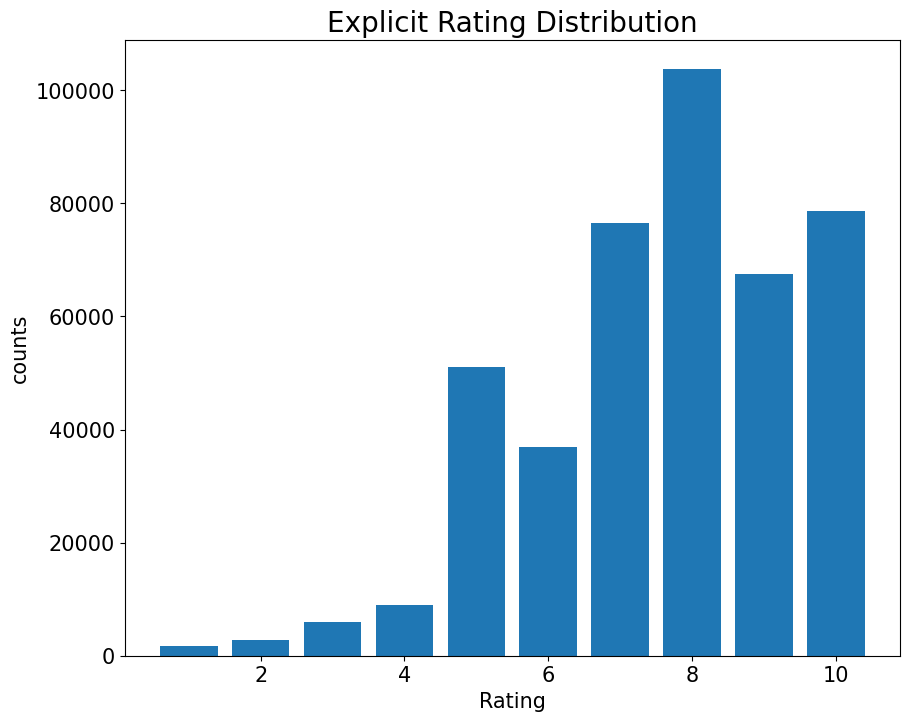

In [31]:
rtg = ratings.bookRating.value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(rtg.index, rtg.values)
plt.xlabel('Rating')
plt.ylabel('counts')
plt.title('Explicit Rating Distribution',size=20)
plt.show()

In [32]:
ratings.head()

userId        ISBN  bookRating
1  276726  0155061224           5
3  276729  052165615X           3
4  276729  0521795028           6
6  276736  3257224281           8
7  276737  0600570967           6

## Data Analysis

In [33]:
def get_alpha3(col):
    try:
        iso_3 =  country_name_to_country_alpha3(col, cn_name_format="lower")
    except:
        iso_3 = 'Unknown'
    return iso_3

def get_name(col):
    try:
        name =  country_alpha2_to_country_name(country_alpha3_to_country_alpha2(col))
    except:
        name = 'Unknown'
    return name

In [34]:
users_copy = users.copy()

In [35]:
users_copy['alpha_3'] = users_copy['country'].apply(lambda x: get_alpha3(x))
users_copy['alpha_3'].loc[users_copy.country == 'usa'] = 'USA'
users_copy['country'] = users_copy['alpha_3'].apply(lambda x: get_name(x))

/Users/channabasavannahatti/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
users_copy.head(5)

userId  age         city            state             country alpha_3
0       1   31          nyc         new york       United States     USA
1       2   18     stockton       california       United States     USA
2       3   39       moscow  yukon territory  Russian Federation     RUS
3       4   17        porto         v.n.gaia            Portugal     PRT
4       5   31  farnborough            hants      United Kingdom     GBR

In [37]:
users_map = users_copy.groupby(['country', 'alpha_3'])['alpha_3'].agg(Users='count').reset_index()
users_map['Users(log)'] = np.log10(users_map["Users"])

fig = px.choropleth(users_map, locations="alpha_3",
                    color='Users(log)',
                    hover_name="country",
                    hover_data=["Users"],
                    color_continuous_scale='Cividis')
fig.update_layout(title_text="Unique Users")
fig.update_layout(coloraxis_colorbar=dict(title='Users', tickprefix='1.e'))
fig.show()

In [38]:
users_city = users_copy['city'].value_counts()[0:10].reset_index().rename(columns={'index':'city','city':'count'})

fig = go.Figure(go.Bar(
    x=users_city['city'],y=users_city['count'],
    marker={'color': users_city['count'], 
    'colorscale': 'Viridis'},  
    text=users_city['count'],
    textposition = "outside",
))
fig.update_layout(title_text=' Top 10 Users City',xaxis_title="City",yaxis_title="Count",title_x=0.5)
fig.show()

In [39]:
df_books_year= books['yearOfPublication'].value_counts()[0:10].reset_index().rename(columns={'index':'yearOfPublication','yearOfPublication':'count'})

fig = go.Figure(go.Bar(
    x= df_books_year['yearOfPublication'],y=df_books_year['count'],
    marker={'color': df_books_year['count'], 
    'colorscale': 'inferno'},  
    text=df_books_year['count'],
    textposition = "outside",
))
fig.update_layout(title_text=' Top 10 Number Of Book Works Published By Years ',xaxis_title="Years",yaxis_title="Count",title_x=0.5)
fig.show()

In [40]:
df_books_publisher= books['publisher'].value_counts()[0:10].reset_index().rename(columns={'index':'publisher','publisher':'count'})

fig = go.Figure(go.Bar(
    x=df_books_publisher['publisher'],y=df_books_publisher['count'],
    marker={'color': df_books_publisher['count'], 
    'colorscale': 'inferno'},  
    text=df_books_publisher['count'],
    textposition = "outside",
))
fig.update_layout(title_text=' Top 10 Publisher',xaxis_title="Publisher",yaxis_title="Count",title_x=0.5)
fig.show()

In [41]:
ratings_matrix = pd.merge(users, ratings, on='userId')
ratings_matrix = pd.merge(ratings_matrix, books, on='ISBN')

In [42]:
stop_words = set(STOPWORDS)
title_string = " ".join(ratings_matrix['bookTitle'].astype(str))
wc = WordCloud(
    width=800,
    height=500, 
    max_font_size=100,
    stopwords=stop_words,
    background_color='white'
).generate(title_string)

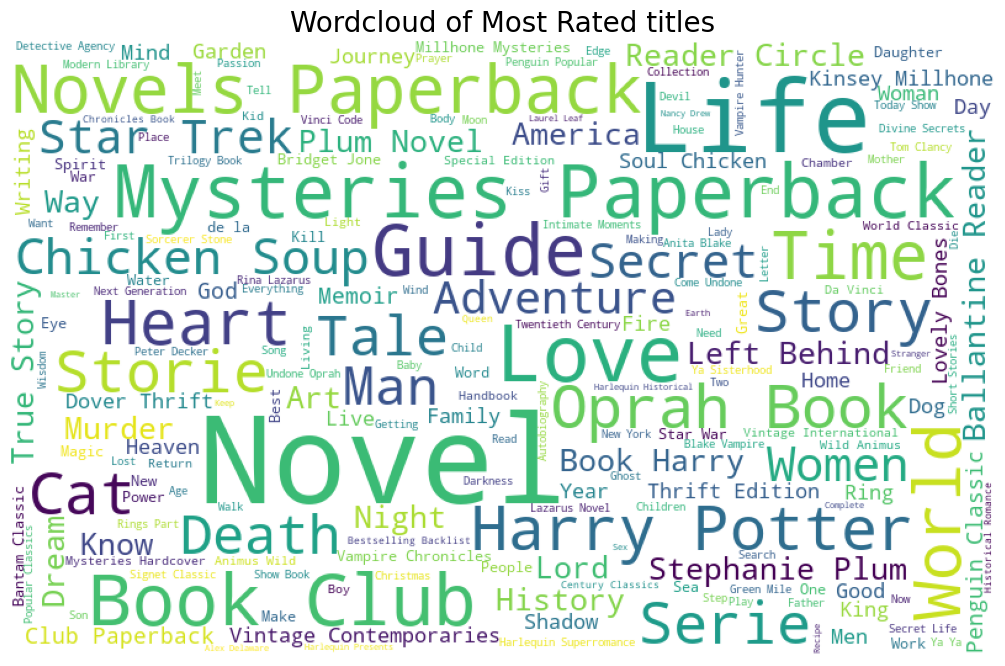

In [43]:
fig=plt.figure(figsize=(16,8))
plt.axis('off')
plt.title('Wordcloud of Most Rated titles', size=20)
plt.imshow(wc)
plt.show()

In [44]:
df_book_name= ratings_matrix['bookTitle'].value_counts()[0:10].reset_index().rename(columns={'index':'book_title','bookTitle':'count'})


colors=['cyan','royalblue','blue','darkblue',"darkcyan",'Brown','Coral','OrangeRed','SaddleBrown','Tomato']
fig = go.Figure([go.Pie(labels=df_book_name['book_title'], values=df_book_name['count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='percent+value', textfont_size=15,
                 marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title="Most Reviewed Books ",title_x=0.3)
fig.show()

In [45]:
#df_books_sum
df_books_sum=ratings_matrix.groupby(by =['bookTitle'])['bookRating'].sum().to_frame().reset_index().rename(columns={'bookTitle':'bookTitle','bookRating':'total_rating'})
df_books_sum=df_books_sum.sort_values(by='total_rating', ascending=False)

#df_books_count
df_books_count=ratings_matrix.groupby(by =['bookTitle'])['bookRating'].count().to_frame().reset_index().rename(columns={'bookTitle':'bookTitle','bookRating':'count_rating'})
df_books_count=df_books_count.sort_values(by='count_rating', ascending=False)



df_books_merge = pd.merge(df_books_sum, df_books_count, on='bookTitle')[0:50]
df_books_merge['rate']=df_books_merge['total_rating']/df_books_merge['count_rating']
df_books_merge=df_books_merge.sort_values(by='rate', ascending=False)

df_books_merge1=df_books_merge[df_books_merge['count_rating']>75]
df_books_merge1=df_books_merge1.sort_values(by='rate', ascending=False)[0:10]

fig = make_subplots(rows=1, cols=1, subplot_titles=(" Best Rated Books"))


fig.add_trace(go.Bar(
    y=df_books_merge1['bookTitle'],x=df_books_merge1['rate'],orientation="h",
    marker={'color': df_books_merge1['rate'], 
    'colorscale': 'jet'},  
    text=df_books_merge1['rate'],
    textposition = "outside"),
    row=1, col=1           
)


fig.update_layout(height=550, width=950,title ="Top 10 Best Rated Books",title_x=0.5)
fig.show()

In [46]:
df_book_name= books['bookTitle'].value_counts()[0:10].reset_index().rename(columns={'index':'bookTitle','bookTitle':'count'})

fig = go.Figure(go.Bar(
    x=df_book_name['bookTitle'],y=df_book_name['count'],
    marker={'color': df_book_name['count'], 
    'colorscale': 'earth'},  
    text=df_book_name['count'],
    textposition = "outside",
))
fig.update_layout(title_text=' Top 10 Same Book Title ',xaxis_title="Books Name",yaxis_title="Count",title_x=0.5)
fig.show()

In [47]:
df_pride_prejudice= books[books['bookTitle']=='Pride and Prejudice']

colors=['DarkKhaki','Coral','DarkSalmon','FireBrick']
    
fig = go.Figure(data=[go.Table(header=dict(values=['Book Title', 'Book Author','Year Of Publication','Publisher'],
                                          line_color='white', fill_color='gray',
                                  align='center',font=dict(color='white', size=12)
                                          ),
                               
                 cells=dict( values=[df_pride_prejudice['bookTitle'], df_pride_prejudice['bookAuthor'],df_pride_prejudice['yearOfPublication'],df_pride_prejudice['publisher']],
                           line_color=colors, fill_color=colors,
                           align='center', font=dict(color='black', size=13))
                              )])
                      

fig.update_layout(
    autosize=False,
    width=800,
    height=800,
   )    

fig.show()

In [48]:
df_author_name= ratings_matrix['bookAuthor'].value_counts()[0:10].reset_index().rename(columns={'index':'bookAuthor','bookAuthor':'count'})

fig = go.Figure(go.Bar(
    x=df_author_name['bookAuthor'],y=df_author_name['count'],
    marker={'color': df_author_name['count'], 
    'colorscale': 'cividis'},  
    text=df_author_name['count'],
    textposition = "outside",
))
fig.update_layout(title_text=' Top 10 Reviewed Book Author',xaxis_title="Author",yaxis_title="Count",title_x=0.5)
fig.show()

In [49]:
df_author_name= books['bookAuthor'].value_counts()[0:10].reset_index().rename(columns={'index':'bookAuthor','bookAuthor':'count'})
df_author_name= books['bookAuthor'].value_counts()[0:10].reset_index().rename(columns={'index':'bookAuthor','bookAuthor':'count'})
df_author_name

fig = go.Figure(go.Bar(
    x=df_author_name['bookAuthor'],y=df_author_name['count'],
    marker={'color': df_author_name['count'], 
    'colorscale': 'temps'},  
    text=df_author_name['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 10 Busiest Authors ',xaxis_title="Author Name",yaxis_title="Count")
fig.show()

In [50]:
!pip install pyarrow


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [51]:
!pip install fastparquet


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [52]:
users.to_parquet('users_prep.parquet.gzip', compression='gzip')
books.to_parquet('books_prep.parquet.gzip', compression='gzip')
ratings.to_parquet('ratings_prep.parquet.gzip', compression='gzip')

In [53]:
!pip install surprise


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
import surprise
import time
import sklearn
from sklearn.metrics.pairwise import sigmoid_kernel
from surprise.model_selection import cross_validate
import re
warnings.filterwarnings('ignore','FutureWarnings')

In [55]:
users = pd.read_parquet('./users_prep.parquet.gzip')

In [56]:
books = pd.read_parquet('./books_prep.parquet.gzip')

In [57]:
ratings = pd.read_parquet('./ratings_prep.parquet.gzip')

In [58]:
print('The shape of Ratings is: ' + str(ratings.shape))
print('The shape of Users is: ' + str(users.shape))
print('The shape of Books is: ' + str(books.shape))

The shape of Ratings is: (433671, 3)
The shape of Users is: (278858, 5)
The shape of Books is: (271357, 5)


Due to memory limitations and large dimensions of utility matrix, we should sample from our dataset. We try to find more active users and more rated books in the dataset.

In [59]:
def popular_ratings(ratings, user_threshold=200, rating_threshold=200, book_threshold=1):
    counts_users = ratings.userId.value_counts()
    counts_ratings = ratings.bookRating.value_counts()
    sample_ratings = ratings[ratings['userId'].isin(counts_users[counts_users >= user_threshold].index)]
    sample_ratings = sample_ratings[ratings['bookRating'].isin(counts_ratings[counts_ratings >= rating_threshold].index)]
    isbn_group = sample_ratings.groupby('ISBN', as_index=False)['bookRating'].count()
    sample_ratings = sample_ratings[sample_ratings.ISBN.isin(list(isbn_group[isbn_group.bookRating > book_threshold].ISBN.values))]
    return sample_ratings

In [60]:
sampled_ratings = popular_ratings(ratings, user_threshold=400, rating_threshold=400, book_threshold=1)
print('Sample Ratings Shape', sampled_ratings.shape)
book_ratings = sampled_ratings.pivot_table(index='userId', columns='ISBN', values='bookRating').fillna(0)
print('Book Ratings Shape', book_ratings.shape)
book_ratings.head()

Sample Ratings Shape (9441, 3)
Book Ratings Shape (43, 4002)


/var/folders/mz/ljx5xmps5vz_wkmvs7xz0zbc0000gn/T/ipykernel_19146/1974362023.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



ISBN    0001056107  0002570122  0006379702  0006514855  0006547613  \
userId                                                               
3757           0.0         0.0         0.0         0.0         0.0   
11676          0.0         0.0         5.0         7.0         0.0   
16795          0.0         0.0         0.0         0.0         0.0   
23872          0.0         0.0         0.0         0.0         0.0   
23902          0.0         0.0         0.0         0.0         8.0   

ISBN    0006550681  0006550789  0007110928  0007144350  0007154615  ...  \
userId                                                              ...   
3757           0.0         0.0         0.0         0.0         0.0  ...   
11676          8.0         7.0         7.0         0.0         7.0  ...   
16795          0.0         0.0         0.0         0.0         0.0  ...   
23872          0.0         0.0         0.0         0.0         0.0  ...   
23902          0.0         0.0         8.0        10.0         0.0  ...   

ISBN    8433551175  8437600685  8440693478  8466609016  8474440556  \
userId                                                               
3757           7.0         0.0         0.0         0.0         8.0   
11676          0.0         0.0         2.0         7.0         6.0   
16795          0.0         0.0         0.0         0.0         0.0   
23872          0.0         0.0         0.0         0.0         0.0   
23902          0.0         0.0         0.0         0.0         0.0   

ISBN    8474444314  8478801960  8485224752  9500700891  9500723549  
userId                                                              
3757           0.0         7.0         5.0         0.0         0.0  
11676          3.0         6.0        10.0         0.0         6.0  
16795          0.0         0.0         0.0         0.0         0.0  
23872          0.0         0.0         0.0         0.0         0.0  
23902          0.0         0.0         0.0         0.0         0.0  

[5 rows x 4002 columns]

In [61]:
user_id_list = book_ratings.index.tolist()
column_names = ["userId", "location", "age"]
sampled_users = pd.DataFrame(columns = column_names)
sampled_users = users.loc[users['userId'].isin(user_id_list)]
sampled_users = sampled_users.reset_index()
sampled_users = sampled_users.drop(['index'], axis=1)

sampled_users.head()

userId  age            city     state         country
0    3757   40          madrid    madrid           spain
1   11676   30             n/a       n/a             n/a
2   16795   47  mechanicsville  maryland             usa
3   23872   22           tulsa  oklahoma             usa
4   23902   36          london   england  united kingdom

In [62]:
book_isbn_list = book_ratings.columns.values.tolist()
column_names = ["ISBN", "bookTitle", "bookAuthor", "yearOfPublication", "publisher"]
sampled_books = pd.DataFrame(columns = column_names)
sampled_books = books.loc[books['ISBN'].isin(book_isbn_list)]
sampled_books = sampled_books.reset_index()
sampled_books = sampled_books.drop(['index'], axis=1)
sampled_books.head()

ISBN                       bookTitle         bookAuthor  \
0  0440234743                   The Testament       John Grisham   
1  0971880107                     Wild Animus       Rich Shapero   
2  0345417623                        Timeline   MICHAEL CRICHTON   
3  0446310786           To Kill a Mockingbird         Harper Lee   
4  0449005615  Seabiscuit: An American Legend  LAURA HILLENBRAND   

   yearOfPublication                publisher  
0               1999                     Dell  
1               2004                  Too Far  
2               2000         Ballantine Books  
3               1988  Little Brown &; Company  
4               2002         Ballantine Books

## 1. Collaborative Filtering

### 1.1 User Based Collaborative Filtering

In [63]:
class UserBasedCollaborativeFiltering():
    
    def __init__(self, users, books, ratings, k=10, max_rating=10.0):
        self.users = users
        self.users = self.users.reset_index()
        self.users = self.users.drop(columns=['index'])
        
        self.books = books
        
        self.ratings = ratings
        self.ratings = self.ratings.reset_index()
        self.ratings = self.ratings.drop(columns=['userId'])
        
        self.k = k
        self.max_rating = max_rating
    
    def normalize(self, dataframe):

        row_sum_ratings = dataframe.sum(axis=1) # sum entries of rows
        non_zero_count = dataframe.astype(bool).sum(axis=1) # count non-zero entries of rows 
        
        dataframe_mean = row_sum_ratings / non_zero_count # mean of rows
        
        self.normalized_ratings = dataframe.subtract(dataframe_mean, axis = 0) # subtract on rows(iteration over columns!)
    
    def compute_similarity(self, x, y):
        return np.dot(x, y)/ (np.linalg.norm(x) * np.linalg.norm(y))


    def create_similarity_matrix(self):          
        num_users = len(self.users)
        similarity_array = np.array([self.compute_similarity(self.ratings.iloc[i,:], self.ratings.iloc[j,:])
                                    for i in range(num_users) for j in range(num_users)])
        similarity_matrix = pd.DataFrame(data = similarity_array.reshape(self.users.shape[0], self.users.shape[0]))
        
        return similarity_matrix
    

    def get_neighbors(self, user_id, similarity_matrix):
        user_index = self.users.loc[self.users['userId'] == user_id].index.values[0]
        user_similairities = similarity_matrix.iloc[user_index].values
        temp_neighbors_index = user_similairities.argsort()[-(self.k + 1):][::-1]
        neighbor_index = np.delete(temp_neighbors_index, np.where(temp_neighbors_index[user_index] == user_index))

        return neighbor_index    

        
    def score_item(self, user_id, neighbor_rating, neighbor_similarity, ratings):
        user_index = self.users.loc[self.users['userId'] == user_id].index.values[0]
        active_user_mean_rating = np.mean(ratings.iloc[user_index, :])
        score = np.dot(neighbor_similarity, neighbor_rating) + active_user_mean_rating
        data = score.reshape(1, len(score))
        columns = neighbor_rating.columns
        return pd.DataFrame(data= data , columns= columns)
    
    
            

    def recommend(self, user_id):
        user_index = self.users.loc[self.users['userId'] == user_id].index.values[0]
        user_ratings = book_ratings.iloc[user_index]
        recommendation_columns = []

        for i in range(len(user_ratings.index)):
            isbn = user_ratings.index[i]
            rating = user_ratings.values[i]
            if rating == 0.0:
                recommendation_columns.append(isbn)

        self.normalize(self.ratings)  
        similarity_matrix = self.create_similarity_matrix()
        neighbor_index = self.get_neighbors(user_id, similarity_matrix)
        neighbor_rating = self.normalized_ratings.loc[neighbor_index][recommendation_columns]
        neighbor_similarity = similarity_matrix[user_index].loc[neighbor_index]
        recommendation_score = self.score_item(user_id, neighbor_rating, neighbor_similarity, self.ratings)
        recommended_book_ISBNs = recommendation_score.stack().nlargest(self.k)
        recommended_book_ISBNs = [recommended_book_ISBNs.index.values[i][1] for i in range(len(recommended_book_ISBNs))]
        recommended_books = self.books.loc[self.books['ISBN'].isin(recommended_book_ISBNs)]

        return recommended_books
    
    

In [64]:
user_based_cf = UserBasedCollaborativeFiltering(sampled_users, sampled_books, book_ratings)

In [65]:
similarity_matrix = user_based_cf.create_similarity_matrix()

In [66]:
user_id = 23872
recommendations = user_based_cf.recommend(user_id)

In [67]:
recommendations.head(10)

ISBN                                          bookTitle  \
52    1558744150  Chicken Soup for the Woman's Soul (Chicken Sou...   
97    0842329129  Left Behind: A Novel of the Earth's Last Days ...   
134   0061009059  One for the Money (Stephanie Plum Novels (Pape...   
219   0345370775                                      Jurassic Park   
267   080410753X                             The Kitchen God's Wife   
385   059035342X  Harry Potter and the Sorcerer's Stone (Harry P...   
489   0399146431                          The Bonesetter's Daughter   
786   043935806X  Harry Potter and the Order of the Phoenix (Boo...   
1726  0811801802  Sabine's Notebook: In Which the Extraordinary ...   
1779  0877017883  Griffin &amp; Sabine: An Extraordinary Corresp...   

            bookAuthor  yearOfPublication                 publisher  
52       Jack Canfield               1996     Health Communications  
97          Tim Lahaye               1996  Tyndale House Publishers  
134    Janet Evanovich               1995               HarperTorch  
219   Michael Crichton               1999          Ballantine Books  
267            Amy Tan               1992                 Ivy Books  
385      J. K. Rowling               1999    Arthur A. Levine Books  
489            Amy Tan               2001   Putnam Publishing Group  
786      J. K. Rowling               2003                Scholastic  
1726      Nick Bantock               1992           Chronicle Books  
1779      Nick Bantock               1991           Chronicle Books

## 1.2 Item Based Collaborative Filtering

In this notebook, we use Weighted Slope One algorithm for item-based filtering.

In this algorithm, it's defined a concept called **deviation** for items. $\text{dev}_(i, j)$ is defined as the average difference between the ratings of $i$ and those of $j$:

$$\text{dev}(i, j) = \sum\limits_{u \in S_{i, j}(X)} \frac {u_{i} - u_{j}}{card(S_{i, j}(X))}$$

Where $card(S)$ is the number of elements in $S$ and $X$ is the number of all ratings. So $card(S_{i, j}(X))$ is the number of people who have rated both items $i$ and $j$

After calculating the deviations between all items, we can use the following formula for predicting the rating of user $u$ to item $j$. The prediction $\hat{r}_{uj}$ is set as:

$$\hat{r}_{uj} = \frac {\sum\limits_{i \in S(u) - {j}} (\text{dev}(j, i) + u_{i})c_{j, i}}{\sum\limits_{i \in S(u) - {j}} c_{j, i}}$$

where $c_{j, i} = card(S_{i, j}(X))$.

In [68]:
class ItemBasedCollaborativeFiltering():    
    
    def __init__(self, users, books, ratings, k=10, max_rating=10.0):
        self.users = users
        self.users = self.users.reset_index()
        self.users = self.users.drop(columns=['index'])
        
        self.books = books
        
        self.ratings = ratings
        self.ratings = self.ratings.reset_index()
        self.ratings = self.ratings.drop(columns=['userId'])
        
        self.k = k
        self.max_rating = max_rating
        
        self.frequencies = {}
        self.deviations = {}
        
    
    def prepare_data(self):
                
        user_indices = list(self.ratings.index.values)

        users_ratings = []
        for user_index in user_indices:
            rated_book_indices = list(self.ratings.iloc[user_index].to_numpy().nonzero()[0])
            users_ratings.append({user_index: dict(self.ratings[self.ratings.columns[rated_book_indices]].iloc[user_index])})
    
        self.users_ratings = users_ratings
        
        return self.users_ratings
        
        
    def compute_deviations(self):
        users_ratings = self.users_ratings
        num_users = len(self.users)
        
        for i in range(num_users):
            for ratings in self.users_ratings[i].values():
                for item, rating in ratings.items():
                    self.frequencies.setdefault(item, {})
                    self.deviations.setdefault(item, {})
                    
                    for (item2, rating2) in ratings.items():
                        if item != item2:
                            self.frequencies[item].setdefault(item2, 0)
                            self.deviations[item].setdefault(item2, 0.0)
                            self.frequencies[item][item2] += 1
                            self.deviations[item][item2] += rating - rating2
            
            for (item, ratings) in self.deviations.items():
                for item2 in ratings:
                    ratings[item2] /= self.frequencies[item][item2]
    
    
    def slope_one_recommend(self, user_ratings):
        recommendations = {}
        frequencies = {}
        
        for (user_item, user_rating) in user_ratings.items():
        
            for (diff_item, diff_ratings) in self.deviations.items():
                if diff_item not in user_ratings and user_item in self.deviations[diff_item]:
                    freq = self.frequencies[diff_item][user_item]
                    recommendations.setdefault(diff_item, 0.0)
                    frequencies.setdefault(diff_item, 0)
        
                    recommendations[diff_item] += (diff_ratings[user_item] + user_rating) * freq
                    frequencies[diff_item] += freq
        
        recommendations = [(k, v / frequencies[k]) for (k, v) in recommendations.items()]
        
        recommendations.sort(key=lambda ratings: ratings[1], reverse = True)
        
        return recommendations
    
    
    def recommend(self, recommendations):
        top_k_recommendations = recommendations[: self.k]
        
        isbns = [recommendation[0] for recommendation in top_k_recommendations]
        
        recommended_books = [self.books.loc[self.books['ISBN'] == isbn] for isbn in isbns]
        return pd.concat(recommended_books)

In [69]:
item_based_cf = ItemBasedCollaborativeFiltering(sampled_users, sampled_books, book_ratings)

In [70]:
users_ratings = item_based_cf.prepare_data()

In [71]:
item_based_cf.compute_deviations()

In [72]:
user_index = 1
pd.DataFrame(sampled_users.iloc[user_index])

1
userId   11676
age         30
city       n/a
state      n/a
country    n/a

In [73]:
recommendations = item_based_cf.slope_one_recommend(users_ratings[user_index][user_index])

In [74]:
item_based_cf.recommend(recommendations)

ISBN                                          bookTitle  \
2949  0385419287                 The 776 Stupidest Things Ever Said   
1217  0140183515  Just So Stories (Penguin Twentieth-Century Cla...   
1757  0394747232    Maus a Survivors Tale: My Father Bleeds History   
3296  0373078110  Hidden Star  (The Stars Of Mithra) (Harlequin ...   
2864  0373078358  Secret Star  (The Stars Of Mithra) (Harlequin ...   
1183  0373218419                                      Blithe Images   
2791  0373218486  Going Home: Unfinished Business/ Island of Flo...   
2477  0373218540                                          Dangerous   
383   0373242328  The Perfect Neighbor (The Macgregors) (The Mac...   
1553  0373243286                Irish Rebel (Special Edition, 1328)   

           bookAuthor  yearOfPublication          publisher  
2949      Ross Petras               1993  Main Street Books  
1217  Rudyard Kipling               1990      Penguin Books  
1757   Art Spiegelman               1986     Pantheon Books  
3296     Nora Roberts               1997         Silhouette  
2864     Nora Roberts               1998         Silhouette  
1183     Nora Roberts               2003         Silhouette  
2791     Nora Roberts               2002         Silhouette  
2477     Nora Roberts               2002         Silhouette  
383      Nora Roberts               1999         Silhouette  
1553     Nora Roberts               2000         Silhouette

## 2. Content-based Filtering

In [75]:
class ContentBasedFiltering():
    
    def __init__(self, books, ratings, k = 10):
        self.ratings = ratings
        self.books = self.prepare_data(books)
        self.tfidf_matrix = self.create_embedding_matrix()
        self.sigmoid = self.create_kernel()
        self.indices = self.create_indices()
        self.k = k
        
        
    def clean(self, text, combine=False):
        text = text.lower()
        text = re.sub('[^a-z0-9 ]', '', text)
        
        if combine:
            return ''.join(t.replace(' ', '') for t in text).strip()
        
        return text.strip()
    
    
    def prepare_data(self, books, rating_threshold = 2):
        
        # select books that has been rated
        rated_books = books[books.ISBN.isin(ratings.ISBN)]
        
        # remove duplicates based on bookTitle
        unique_books = rated_books.drop_duplicates(subset = ['bookTitle'], keep = False)
        
        # if rating count of a book > rating_threshold, then the book will be selected.
        popular_ISBN = list(self.ratings.ISBN.value_counts()[self.ratings.ISBN.value_counts() >= rating_threshold].index)
        
        # Only keep the books that its rating count is > rating_threshold; this means that it is popular.
        popular_books = unique_books[unique_books.ISBN.isin(popular_ISBN)]
        
        popular_books['bookTitleClean'] = popular_books['bookTitle'].map(lambda x: self.clean(x, combine=False))
        
        popular_books['spaghetti'] = popular_books['bookTitleClean']
        
        return popular_books 
    
    
    def create_embedding_matrix(self):
        from sklearn.feature_extraction.text import TfidfVectorizer
        
        self.books['spaghetti'] = self.books['spaghetti'].fillna('')
        self.books = self.books.reset_index()

        tfidf_vectorizer = TfidfVectorizer(
#             min_df = 3, 
#             max_features = None, 
#             strip_accents = 'unicode', 
#             analyzer = 'word',
#             token_pattern = r'\w{1,}',
#             ngram_range = (1, 3),
            stop_words = 'english'
        )

        tfidf_matrix = tfidf_vectorizer.fit_transform(self.books['spaghetti'])
        print('tf-idf embedding matrix shape = ' + str(tfidf_matrix.shape))
        
        return tfidf_matrix
    
    def create_kernel(self):
        return sigmoid_kernel(self.tfidf_matrix, self.tfidf_matrix)
        
    
    def create_indices(self):
        return pd.Series(self.books.index, index = self.books['bookTitle']).drop_duplicates()
    
    
    def recommend(self, query):
        
        idx = self.indices[query]

        sigmoid_scores = list(enumerate(self.sigmoid[idx]))
        sigmoid_scores = sorted(sigmoid_scores, key=lambda x: x[1], reverse=True)
        sigmoid_scores = sigmoid_scores[1: self.k + 1]
        
        book_indices = [i[0] for i in sigmoid_scores]
        
        recommendations =  pd.DataFrame(self.books.iloc[book_indices])
        recommendations = recommendations.drop(columns=['index', 'bookTitleClean', 'spaghetti'])
        
        return recommendations

In [76]:
content_based_cf = ContentBasedFiltering(sampled_books, sampled_ratings)

tf-idf embedding matrix shape = (3624, 4741)


In [77]:
query = 'Wild Animus'
content_based_cf.recommend(query)

ISBN                                          bookTitle  \
277   0385486804                                      Into the Wild   
428   1559029838                                   Call of the Wild   
2616  0515132292                                               Wild   
2060  1551668777                                    So Wild A Heart   
3247  0843953004                                        Wild Desire   
3390  0399149279                                         Wild Pitch   
2612  0743437128                             Wild Orchids : A Novel   
907   0380812037                   On a Wild Night (Cynster Novels)   
1858  0373240880  Waiting For Nick  (Those Wild Ukrainians) (Sil...   
957   0671769316  NEW ROADSIDE AMERICA : THE MODERN TRAVELER'S G...   

             bookAuthor  yearOfPublication                 publisher  
277        Jon Krakauer               1997                    Anchor  
428         Jack London               1994  Selldowns/no More Orders  
2616        Lori Foster               2002                Jove Books  
2060       Candace Camp               2002                      Mira  
3247        Phoebe Conn               2003             Leisure Books  
3390        Mike Lupica               2002   Putnam Publishing Group  
2612      Jude Deveraux               2003               Atria Books  
907   Stephanie Laurens               2002                      Avon  
1858       Nora Roberts               1997                Silhouette  
957          Doug Kirby               1992                  Fireside

## 3. Machine Learning based Model

### Sampling Data(Candidate Generation)

In [78]:
quality_book = ratings['ISBN'].value_counts().rename_axis('ISBN').reset_index(name = 'Count')
quality_book = quality_book[quality_book['Count'] > 5]['ISBN'].to_list()
quality_ratings = ratings[ratings['ISBN'].isin(quality_book)]
quality_ratings

userId        ISBN  bookRating
8        276744  038550120X           7
16       276747  0060517794           9
19       276747  0671537458           9
20       276747  0679776818           8
28       276754  0684867621           8
...         ...         ...         ...
1149743  276688  0836218655          10
1149744  276688  0836236688          10
1149761  276704  0345386108           6
1149771  276704  0743211383           7
1149777  276709  0515107662          10

[183102 rows x 3 columns]

In [79]:
quality_user = quality_ratings['userId'].value_counts().rename_axis('userId').reset_index(name = 'Count')
quality_user = quality_user[quality_user['Count']>5]['userId'].to_list()
quality_ratings = quality_ratings[quality_ratings['userId'].isin(quality_user)]
quality_ratings

userId        ISBN  bookRating
174      276847  3257200552           5
177      276847  3404148576           8
179      276847  3423071516          10
182      276847  3426029553           8
186      276847  3442413508          10
...         ...         ...         ...
1149715  276688  0553575104           6
1149738  276688  0688156134           8
1149739  276688  0743202694          10
1149743  276688  0836218655          10
1149744  276688  0836236688          10

[118013 rows x 3 columns]

In [80]:
quality_user = quality_ratings['userId'].value_counts().rename_axis('userId').reset_index(name = 'Count')
quality_user = quality_user[quality_user['Count']>5]['userId'].to_list()
quality_ratings = quality_ratings[quality_ratings['userId'].isin(quality_user)]
quality_ratings

userId        ISBN  bookRating
174      276847  3257200552           5
177      276847  3404148576           8
179      276847  3423071516          10
182      276847  3426029553           8
186      276847  3442413508          10
...         ...         ...         ...
1149715  276688  0553575104           6
1149738  276688  0688156134           8
1149739  276688  0743202694          10
1149743  276688  0836218655          10
1149744  276688  0836236688          10

[118013 rows x 3 columns]

In [81]:
book_ratings = quality_ratings.pivot_table(index='userId', columns='ISBN', values='bookRating').fillna(0)

In [82]:
user_id_list = book_ratings.index.tolist()
column_names = ["userId", "location", "age"]
sampled_users = pd.DataFrame(columns = column_names)
sampled_users = users.loc[users['userId'].isin(user_id_list)]
sampled_users = sampled_users.reset_index()
sampled_users = sampled_users.drop(['index'], axis=1)

sampled_users.head()

userId  age             city         state country
0     114   57         ligonier  pennsylvania     usa
1     243   19      arden hills     minnesota     usa
2     244   56  college station         texas     usa
3     254   24      minneapolis     minnesota     usa
4     388   35        nashville     tennessee     usa

In [83]:
book_isbn_list = book_ratings.columns.values.tolist()
column_names = ["ISBN", "bookTitle", "bookAuthor", "yearOfPublication", "publisher"]
sampled_books = pd.DataFrame(columns = column_names)
sampled_books = books.loc[books['ISBN'].isin(book_isbn_list)]
sampled_books = sampled_books.reset_index()
sampled_books = sampled_books.drop(['index'], axis=1)
sampled_books.head()

ISBN                                          bookTitle  \
0  0002005018                                       Clara Callan   
1  0374157065  Flu: The Story of the Great Influenza Pandemic...   
2  0399135782                             The Kitchen God's Wife   
3  0440234743                                      The Testament   
4  0452264464               Beloved (Plume Contemporary Fiction)   

             bookAuthor  yearOfPublication              publisher  
0  Richard Bruce Wright               2001  HarperFlamingo Canada  
1      Gina Bari Kolata               1999   Farrar Straus Giroux  
2               Amy Tan               1991       Putnam Pub Group  
3          John Grisham               1999                   Dell  
4         Toni Morrison               1994                  Plume

### Rating Normalization(Gaussian Normalization)

$${R}^{u_{i}}_{norm}(b) = \frac {R_{b} - R^{u_{i}}_{mean}}{\sqrt {\sum\limits_{j} (R_{b_{j}} - R^{u_{i}}_{mean})}}$$

In [84]:
mean_rating_user = quality_ratings.groupby('userId')['bookRating'].mean().reset_index(name='Mean-Rating-User')
mean_data = pd.merge(quality_ratings, mean_rating_user, on='userId')
mean_data['Diff'] = mean_data['bookRating'] - mean_data['Mean-Rating-User']
mean_data['Square'] = (mean_data['Diff'])**2
norm_data = mean_data.groupby('userId')['Square'].sum().reset_index(name='Mean-Square')
norm_data['Root-Mean-Square'] = np.sqrt(norm_data['Mean-Square'])
mean_data = pd.merge(norm_data, mean_data, on='userId')
mean_data['Norm-Rating'] = mean_data['Diff']/(mean_data['Root-Mean-Square'])  
mean_data['Norm-Rating'] = mean_data['Norm-Rating'].fillna(0)
max_rating = mean_data.sort_values('Norm-Rating')['Norm-Rating'].to_list()[-1]
min_rating = mean_data.sort_values('Norm-Rating')['Norm-Rating'].to_list()[0]
mean_data['Norm-Rating'] = 5*(mean_data['Norm-Rating'] - min_rating)/(max_rating-min_rating)
mean_data['Norm-Rating'] = np.ceil(mean_data['Norm-Rating']).astype(int)
norm_ratings = mean_data[['userId','ISBN','Norm-Rating']]
mean_data.sort_values('Norm-Rating')

userId  Mean-Square  Root-Mean-Square        ISBN  bookRating  \
55125   124989     0.956522          0.978019  0061092096           9   
19248    38950    32.250000          5.678908  3596150655           4   
60438   136291     8.833333          2.972092  0679433015           7   
114902  270121    10.000000          3.162278  0020442203           6   
60439   136313    13.500000          3.674235  006016848X           6   
...        ...          ...               ...         ...         ...   
81525   188589     2.857143          1.690309  0804106304           9   
74264   170693     3.500000          1.870829  0515126772           7   
77999   179532     5.333333          2.309401  0575400188           9   
109655  256270     3.500000          1.870829  0385504209           9   
74360   170869     1.428571          1.195229  0440509238          10   

        Mean-Rating-User      Diff     Square  Norm-Rating  
55125           9.956522 -0.956522   0.914934            0  
19248           7.750000 -3.750000  14.062500            1  
60438           9.166667 -2.166667   4.694444            1  
114902          8.000000 -2.000000   4.000000            1  
60439           9.250000 -3.250000  10.562500            1  
...                  ...       ...        ...          ...  
81525           7.857143  1.142857   1.306122            5  
74264           5.500000  1.500000   2.250000            5  
77999           7.333333  1.666667   2.777778            5  
109655          7.500000  1.500000   2.250000            5  
74360           9.285714  0.714286   0.510204            5  

[118013 rows x 9 columns]

## Model Selection

In [85]:
reader = surprise.Reader(rating_scale=(0, 5))
data = surprise.Dataset.load_from_df(norm_ratings[['userId', 'ISBN', 'Norm-Rating']], reader)

In [86]:
benchmark = []

algorithms = [surprise.SVD(), surprise.SVDpp(), surprise.SlopeOne(), surprise.NMF(), surprise.NormalPredictor(), surprise.KNNBaseline(), surprise.KNNBasic(), surprise.KNNWithMeans(), surprise.KNNWithZScore(), surprise.BaselineOnly(), surprise.CoClustering()]

print ("Attempting: ", str(algorithms), '\n\n\n')

for algorithm in algorithms:
    print("Starting: " ,str(algorithm))
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    #tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    new_row = pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']).T
    tmp = pd.concat((tmp, new_row))
    #tmp = pd.concat(pd.Series(tmp,[str(algorithm).split(' ')[0].split('.')[-1]])
    benchmark.append(tmp)
    print("Done: " ,str(algorithm), "\n\n")

print ('\n\tDONE\n')

Attempting:  [<surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7fedcb1c49a0>, <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7fedb9796f70>, <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x7fedcb1c4820>, <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7fedcb1c4730>, <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7fedcb294ca0>, <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7fedcb294e80>, <surprise.prediction_algorithms.knns.KNNBasic object at 0x7fedcb294b50>, <surprise.prediction_algorithms.knns.KNNWithMeans object at 0x7fedcb294f10>, <surprise.prediction_algorithms.knns.KNNWithZScore object at 0x7fedcb294370>, <surprise.prediction_algorithms.baseline_only.BaselineOnly object at 0x7fedcb294eb0>, <surprise.prediction_algorithms.co_clustering.CoClustering object at 0x7fedcb2949d0>] 



Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7fedcb1

In [91]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
surprise_results

test_rmse    fit_time  test_time
Algorithm                                        
BaselineOnly      0.623280    0.192564   0.222870
SVD               0.638522    6.494841   0.407166
SVDpp             0.641989  115.723857   4.864443
KNNBasic          0.651439    1.577534   1.285933
KNNBaseline       0.656278    2.322147   1.397946
KNNWithMeans      0.716490    1.653289   1.342687
KNNWithZScore     0.730800    1.905347   1.265695
SlopeOne          0.745749    6.630534   2.457964
NMF               0.752147    6.531889   0.327175
CoClustering      0.762514    2.954660   0.337279
NormalPredictor   0.875563    0.103962   0.304171

In [92]:
from surprise.model_selection import train_test_split
from surprise import accuracy
train_set, test_set = train_test_split(data, test_size=0.25)
baseline = surprise.BaselineOnly(bsl_options={'method': 'sgd','learning_rate': .00005, 'n_epochs':30, 'reg':0.5})
fit = baseline.fit(train_set)
predictions = fit.test(test_set)
accuracy.rmse(predictions)

Estimating biases using sgd...
RMSE: 0.6160


0.6159749389216976

In [93]:
recommend = baseline.trainset
users_norm = list(set(norm_ratings['userId'].to_list()))
books_norm = list(set(norm_ratings['ISBN'].to_list()))
norm_ratings['userId'].unique()

array([   114,    243,    244, ..., 278582, 278633, 278843])

In [94]:
pred_users = [user for user in users_norm if recommend.knows_user(recommend.to_inner_uid(user))]
pred_books = []
for book in books_norm:
    try:
        if recommend.knows_item(recommend.to_inner_iid(book)):
            pred_books.append(book)
    except:
        pass

### Model Evaluation

In [106]:
def recommend_books(user_id, count):
    result=[]
    user_id=int(user_id)
    for b in pred_books:
        result.append([b, baseline.predict(user_id,b,r_ui=4).est])
    recom = pd.DataFrame(result, columns=['ISBN','Rating'])
    merge = pd.merge(recom,books, on='ISBN' )
    return merge.sort_values('Rating', ascending=False).head(count)['bookTitle']

In [96]:
!pip install gradio


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [103]:
#user_id = '36938'
#top_k = 100
#recommendation = recommend_books(user_id, top_k)

In [ ]:
from dataclasses import dataclass
import dataclasses
import gradio as gr


demo = gr.Interface(fn=recommend_books, inputs=['text',gr.inputs.Slider(0,50)], outputs='text')

demo.launch(debug=True)

/Users/channabasavannahatti/opt/anaconda3/lib/python3.8/site-packages/gradio/inputs.py:88: UserWarning:

Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components

/Users/channabasavannahatti/opt/anaconda3/lib/python3.8/site-packages/gradio/deprecation.py:40: UserWarning:

`optional` parameter is deprecated, and it has no effect



Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/Users/channabasavannahatti/opt/anaconda3/lib/python3.8/site-packages/gradio/routes.py", line 289, in run_predict
    output = await app.blocks.process_api(
  File "/Users/channabasavannahatti/opt/anaconda3/lib/python3.8/site-packages/gradio/blocks.py", line 982, in process_api
    result = await self.call_function(fn_index, inputs, iterator)
  File "/Users/channabasavannahatti/opt/anaconda3/lib/python3.8/site-packages/gradio/blocks.py", line 824, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/Users/channabasavannahatti/opt/anaconda3/lib/python3.8/site-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/Users/channabasavannahatti/opt/anaconda3/lib/python3.8/site-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/Users/channabasavannahatti/opt/anaconda3/lib/python3.8/site-packages/anyio/_back

### Scoring

In [104]:
#scoring = recommendation
#scoring

10450                              The Secret Life of Bees
8804                                     The Da Vinci Code
438                                  To Kill a Mockingbird
1045                             The Lovely Bones: A Novel
383                    The Red Tent (Bestselling Backlist)
                               ...                        
10196                                     Schindler's List
1725     Stranger in a Strange Land (Remembering Tomorrow)
10313                                  Lucky Man: A Memoir
4861                 Their Eyes Were Watching God: A Novel
3616                                Memoirs of a Geisha Uk
Name: bookTitle, Length: 100, dtype: object